In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib.colors import ListedColormap

 SCENARIO 1 – K-NEAREST NEIGHBORS (KNN)

 

Problem Statement

Predict whether a tumor is benign or malignant based on medical measurements.

 

Dataset (Kaggle – Public)

Breast Cancer Dataset

Dataset Link: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

 

Target Variable: Diagnosis (Benign / Malignant)

Input Feature:

• Radius

• Texture

• Perimeter

• Area

• Smoothness

 

IN-LAB TASKS (KNN Classification)

1. Import required Python libraries.

2. Load the Breast Cancer dataset.

3. Perform data inspection & preprocessing.

4. Encode target labels.

5. Apply feature scaling (very important for KNN).

6. Split dataset into training and testing sets.

7. Train a KNN classifier.

8. Experiment with different values of K.

9. Predict diagnosis labels.

10. Evaluate performance using:

• Accuracy

• Precision / Recall / F1 Score

11. Identify misclassified cases.

12. Analyze model sensitivity to K.

 

Visualization

• Confusion Matrix

• Accuracy vs K Plot

• Decision Boundary (using two features) 

Dataset Head:
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_

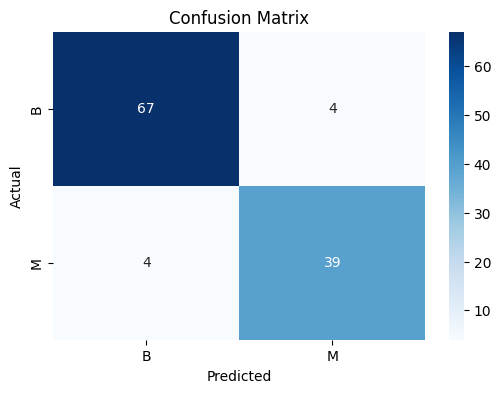

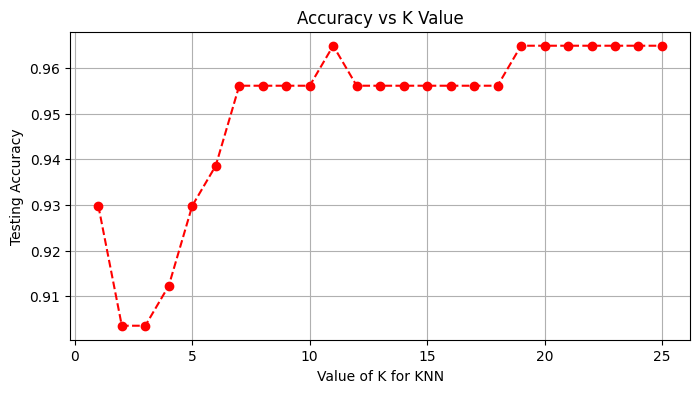

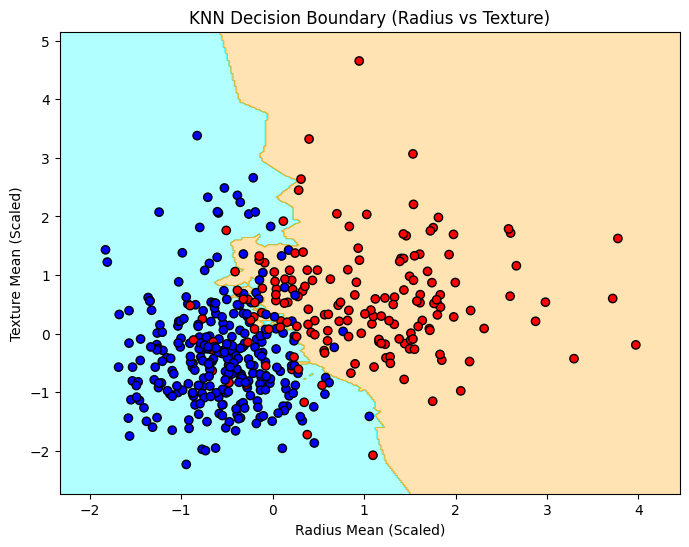

In [ ]:

# SHAQEEEQ 24BAD109

# 1 & 2. Load and Fix the dataset
# Note: The dataset file may have formatting where lines are wrapped in extra quotes.
df_raw = pd.read_csv(r"C:\Users\HP\Downloads\breast-cancer.csv")
# Split the single combined column into individual features
new_columns = df_raw.columns[0].split(',')
df = df_raw.iloc[:, 0].str.split(',', expand=True)
df.columns = new_columns

# Convert numeric columns to float (they were strings after splitting)
numeric_cols = [col for col in df.columns if col not in ['id', 'diagnosis']]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

# 3. Data inspection & preprocessing
print("Dataset Head:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

# Define input features and target
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
X = df[features]
y = df['diagnosis']

# 4. Encode target labels (Malignant=M, Benign=B)
le = LabelEncoder()
y = le.fit_transform(y)
class_names = le.classes_

# 5. Apply feature scaling (Critical for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Split dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 7 & 8. Experiment with different values of K
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# 9 & 10. Predict and Evaluate performance for the best K (e.g., K=5)
best_k = 5
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)

print(f"\nEvaluation for K={best_k}:")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final, target_names=class_names))

# 11. Identify misclassified cases
misclassified_indices = np.where(y_test != y_pred_final)[0]
print(f"\nNumber of misclassified cases: {len(misclassified_indices)}")

# --- VISUALIZATIONS ---

# Confusion Matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')

# Accuracy vs K Plot
plt.figure(figsize=(8, 4))
plt.plot(k_range, scores, marker='o', linestyle='dashed', color='red')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('Accuracy vs K Value')
plt.grid(True)
plt.savefig('accuracy_vs_k.png')

# Decision Boundary (using first two features: Radius vs Texture)
def plot_decision_boundaries(X, y, model, labels):
    X_reduced = X[:, :2] 
    model.fit(X_reduced, y)
    
    h = .02
    x_min, x_max = X_reduced[:, 0].min() - 0.5, X_reduced[:, 0].max() + 0.5
    y_min, y_max = X_reduced[:, 1].min() - 0.5, X_reduced[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('cyan', 'orange')))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolors='k', cmap=ListedColormap(('blue', 'red')))
    plt.xlabel('Radius Mean (Scaled)')
    plt.ylabel('Texture Mean (Scaled)')
    plt.title('KNN Decision Boundary (Radius vs Texture)')
    plt.savefig('decision_boundary.png')

plot_decision_boundaries(X_train, y_train, KNeighborsClassifier(n_neighbors=best_k), class_names)

 You said

SCENARIO 2 – DECISION TREE CLASSIFIER

 

Problem Statement

Predict whether a loan application should be approved or rejected.

 

Dataset (Public / Standard Dataset)

Loan Prediction Dataset

Dataset Link: https://www.kaggle.com/datasets/ninzaami/loan-predication

 

Target Variable: Loan Status (Approved / Rejected)

Input Features

• Applicant Income

• Loan Amount

• Credit History

• Education

• Property Area

 

IN-LAB TASKS (Decision Tree Classification)

1. Import required Python libraries.

2. Load the Loan Prediction dataset.

3. Perform preprocessing:

• Handle missing values

• Encode categorical variables

4. Split dataset into training and testing sets.

5. Train a Decision Tree classifier.

6. Experiment with tree depth / pruning.

7. Predict loan status.

8. Evaluate performance using:

• Accuracy

• Precision / Recall / F1 Score

9. Analyze feature importance.

10. Detect overfitting behavior.

11. Compare shallow vs deep trees.

 

Visualization

• Confusion Matrix

• Tree Structure Plot

• Feature Importance Plot 

--- OVERFITTING ANALYSIS ---
Shallow Tree (Max Depth 3): Train Acc = 0.82, Test Acc = 0.76
Deep Tree (Unpruned):      Train Acc = 1.00, Test Acc = 0.72

--- CLASSIFICATION REPORT (SHALLOW TREE) ---
              precision    recall  f1-score   support

    Rejected       0.78      0.42      0.55        43
    Approved       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



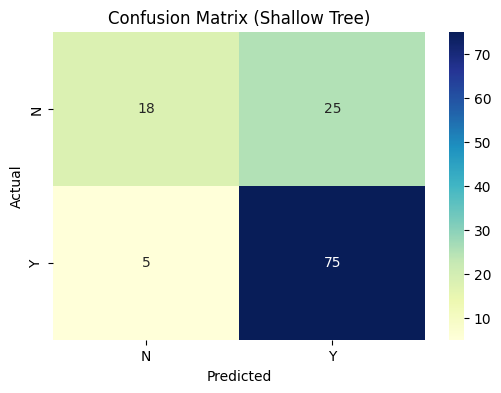

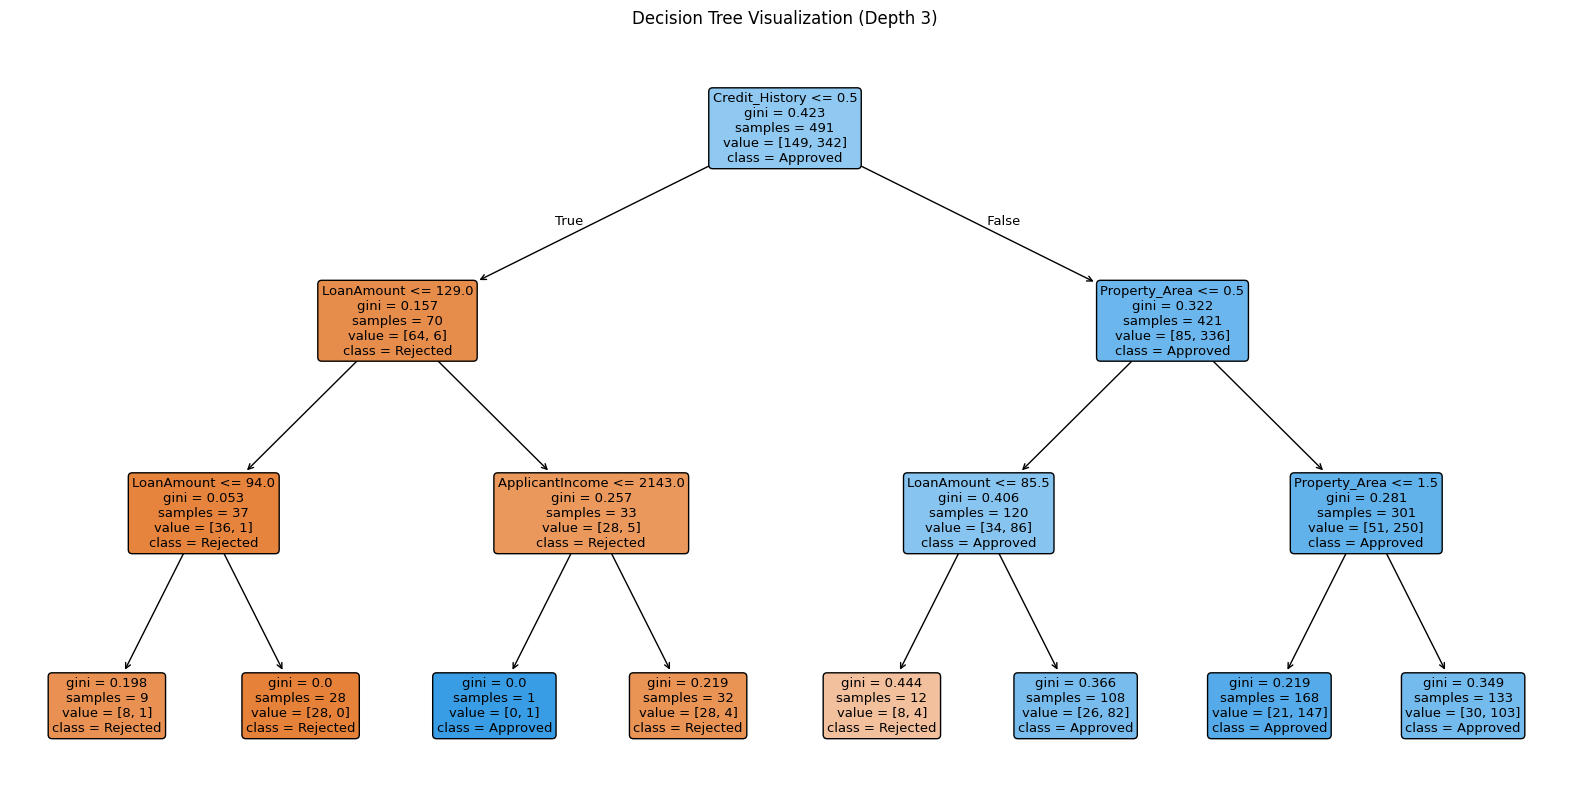

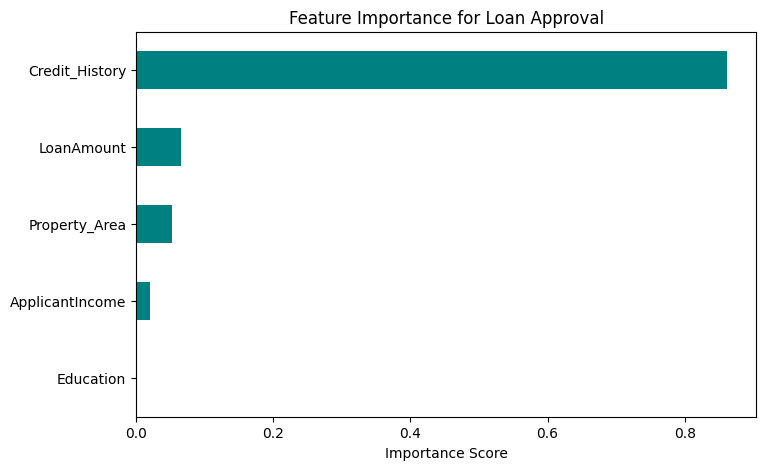

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# 1 & 2. Load the Loan Prediction dataset
# Fixing file formatting (CSV columns are merged into one string)
df_raw = pd.read_csv(r"C:\Users\HP\Downloads\train_u6lujuX_CVtuZ9i (1).csv")
col_names = df_raw.columns[0].split(',')
df = df_raw.iloc[:, 0].str.split(',', expand=True)
df.columns = col_names

# Convert numeric columns from strings to numbers
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 3. Preprocessing
# Select specified features
input_features = ['ApplicantIncome', 'LoanAmount', 'Credit_History', 'Education', 'Property_Area']

# Handle missing values
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# Encode categorical variables
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])   # Graduate=0, Not Graduate=1
df['Property_Area'] = le.fit_transform(df['Property_Area']) # Rural=0, Semiurban=1, Urban=2
df['Loan_Status'] = le.fit_transform(df['Loan_Status']) # N=0, Y=1

X = df[input_features]
y = df['Loan_Status']

# 4. Split dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5, 6, 10 & 11. Train Decision Trees (Comparing Shallow vs Deep)
# Shallow Tree (Pruned for better generalization)
shallow_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
shallow_tree.fit(X_train, y_train)

# Deep Tree (Unpruned - prone to overfitting)
deep_tree = DecisionTreeClassifier(max_depth=None, random_state=42)
deep_tree.fit(X_train, y_train)

# 7 & 8. Evaluate Performance
y_pred_shallow = shallow_tree.predict(X_test)

print("--- OVERFITTING ANALYSIS ---")
print(f"Shallow Tree (Max Depth 3): Train Acc = {accuracy_score(y_train, shallow_tree.predict(X_train)):.2f}, Test Acc = {accuracy_score(y_test, y_pred_shallow):.2f}")
print(f"Deep Tree (Unpruned):      Train Acc = {accuracy_score(y_train, deep_tree.predict(X_train)):.2f}, Test Acc = {accuracy_score(y_test, deep_tree.predict(X_test)):.2f}")

print("\n--- CLASSIFICATION REPORT (SHALLOW TREE) ---")
print(classification_report(y_test, y_pred_shallow, target_names=['Rejected', 'Approved']))

# 9. Feature Importance
importance = pd.Series(shallow_tree.feature_importances_, index=input_features)

# --- VISUALIZATIONS ---

# 1. Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_shallow), annot=True, fmt='d', cmap='YlGnBu', xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title('Confusion Matrix (Shallow Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Tree Structure Plot

plt.figure(figsize=(20, 10))
plot_tree(shallow_tree, feature_names=input_features, class_names=['Rejected', 'Approved'], filled=True, rounded=True)
plt.title('Decision Tree Visualization (Depth 3)')
plt.show()

# 3. Feature Importance Plot

plt.figure(figsize=(8, 5))
importance.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importance for Loan Approval')
plt.xlabel('Importance Score')
plt.show()